<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/Dheeraj_Module02_Lab_1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 2: Appreciating, Interpreting and Visualizing Data**

Manifold Learning Methods

Today, we will be focussing on non-linear dimensionality reduction methods or Manifold learning methods.

So a manifold is any space that is locally Euclidean. For example, the Earth is round but it looks flat to us. The Earth is a manifold: locally it is flat, but globally we know it is a sphere. Then, manifold learning performs dimensionality reduction by representing data as low-dimensional manifolds embedded in a higher-dimensional space.

We often suspect that high-dim may actually lie on or near a low-dim manifold (often much lower!) and it would be useful if we could reparametrize the data in terms of this manifold, yielding a low-dim embedding BUT - we typically don’t know the form of this manifold

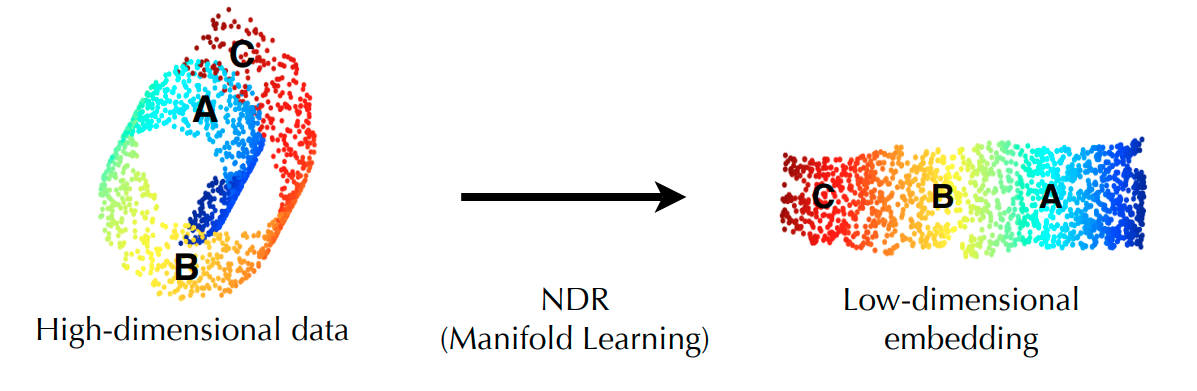

ISOMAP


Isomap stands for ISOmetric feature MAPping. Isomap is a non-linear dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension.

ISOMAP


Isomap stands for ISOmetric feature MAPping. Isomap is a non-linear dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension.


But what are Geodesic Distances?

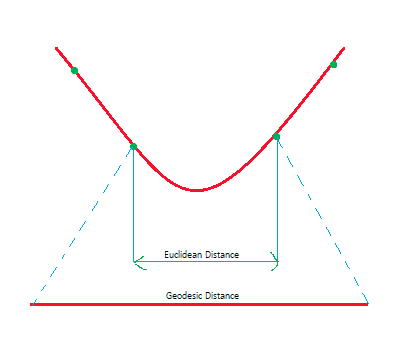


The next question should be:

How can we compute geodesics without knowing the manifold? ....... ANSWER: So we build an adjacency graph and approximate geodesic distances by shortest-paths through the graph.

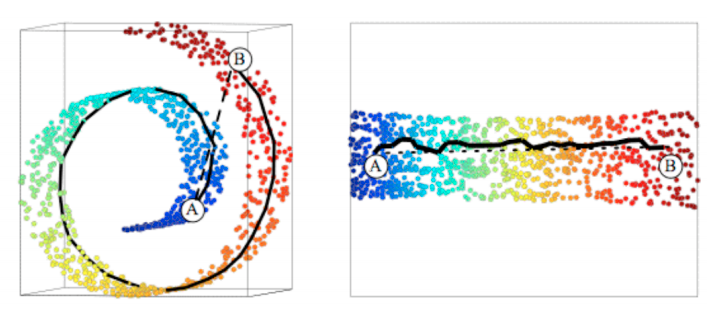

 3 steps for ISOMAP:

1.Build the adjacency graph over the points using a Neighbourhood selection method (let's say k nearest neighbours)

2.Compute approximate geodesics: Weight graph edges by inter-point distances and then apply Dijkstra’s all-pairs shortest-paths algorithm.

3.Take the top d eigenvectors of the Gram matrix.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

First let us simulate a dataset with the points lying on a manifold which we would want our Isomap to be able to capture.

We will be using the make_s_curve() function in the sklearn.datasets module to make the manifold using 1000 data points

In [ ]:
n_points = 500
noise_level = 0.1
random_state = 42
X, color = datasets.make_s_curve(n_points, noise=noise_level, random_state=random_state)

Text(0.5, 0.92, 'S-curve Dataset Visualization')

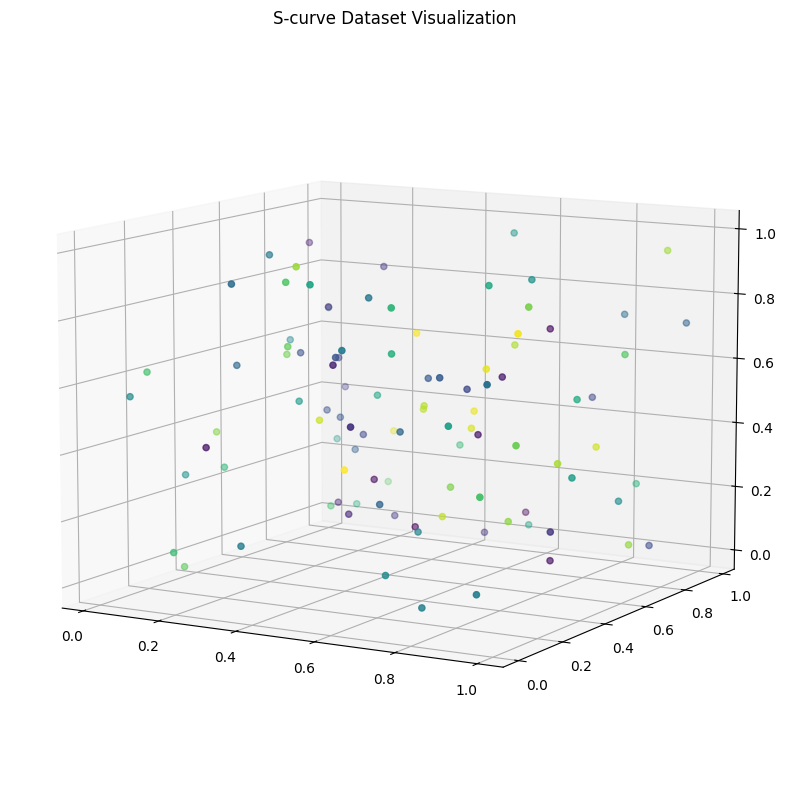

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis, s=20)
ax.view_init(elev=10, azim=-60)
plt.title("S-curve Dataset Visualization")

Note that all the points appear to be a lying on a curved 2d plane in this 3d dataset. Now we will be coding the Isomap algorithm to perform this manifold learning

Step 1a: First lets compute the distance matrix (pairwise Euclidean distances) from the data

In [36]:
from scipy.spatial.distance import pdist, squareform
distances = squareform(pdist(X, metric='euclidean'))
distances.shape

(100, 100)


Step 1b: Let us keep only k nearest neighbors for each point in the distance matrix.

In [37]:
# Lets keep only the 10 nearest neighbors, others set to 0 (= unreachable)
n_neighbors = 10 # Define n_neighbors
# neighbors = np.zeros(distances.shape)
# sort_distances = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]
# for k,i in enumerate(sort_distances):
#     neighbors[k,i] = distances[k,i] can you code in different way by using different parameters in 5 lines can you generate code without any one license generate newly

import numpy as np
nearest_neighbor_indices = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]

# Create a boolean mask where only the nearest neighbors are True
mask = np.zeros_like(distances, dtype=bool)
for i in range(distances.shape[0]):
    mask[i, nearest_neighbor_indices[i]] = True

# Set the distances of non-neighbors to 0
neighbors = np.where(mask, distances, 0)

# The second np.where is redundant as the first one already sets non-positive values to 0
# neighbors = np.where(neighbors > 0, neighbors, 0)

In [38]:
neighbors.shape

(100, 100)

Step 2: Weight graph edges by inter-point distances and then apply Dijkstra’s all-pairs shortest-paths algorithm.

We will be using the graph_shortest_path() function in the sklearn.utils.graph module.

The function takes an array of positive distances as the parameter. It then performs a shortest-path graph search on the graph and returns a matrix G (shape = N,N), where, G(i,j) gives the shortest distance from point i to point j along the graph.

In [39]:
from scipy.sparse.csgraph import shortest_path

graph = shortest_path(neighbors, directed=False)

Step 3: Take the top d eigenvectors of the Gram matrix.

So let us first compute the gram matrix. If we have a matrix graph, then its Gram matrix is graph.T * graph

In [40]:
from scipy.sparse.csgraph import shortest_path


graph = shortest_path(neighbors, directed=False)


We will now be computing the eigenvectors for this matrix, so lets first center the data points.

In [3]:
from scipy.sparse.csgraph import shortest_path
import numpy as np

# Assuming 'neighbors' is defined in a previous cell or elsewhere in the notebook
# --- Suggested Change ---
# Define the 'neighbors' variable with your graph data.
# This is a placeholder example for a simple adjacency matrix (NumPy array).
# Replace this with your actual graph representation.
neighbors = np.array([[0, 1, 0, 1],
                      [1, 0, 1, 0],
                      [0, 1, 0, 1],
                      [1, 0, 1, 0]])
# --- End of Suggested Change ---


graph = shortest_path(neighbors, directed=False)

Computing eigenvectors

In [8]:
import numpy as np
# Use different parameters for dimensionality reduction
n_components_new = 3
reduced_matrix_new = np.zeros((n_components_new, gram.shape[1]))
for i in range(n_components_new):
  # Correctly access the eigenvector (second element of the tuple)
  reduced_matrix_new[i,:] = eig_pairs[i][1]
reduced_matrix_new = reduced_matrix_new.T

# Use Chebyshev distance for pdist (requires reinstalling scipy)
# !pip install scipy --upgrade
# distances_chebyshev = squareform(pdist(X, metric='chebyshev'))


Plotting the resultant reduced_matrix

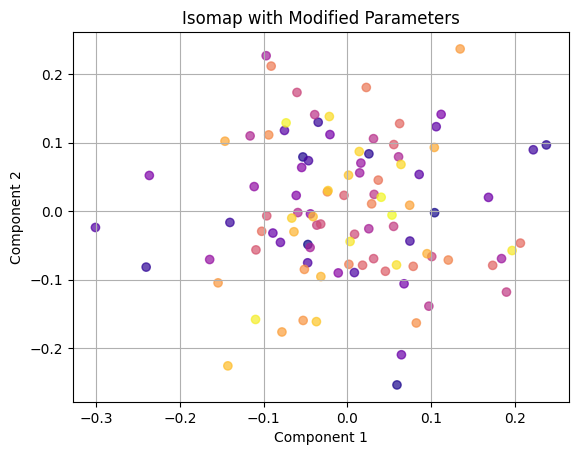

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your original dataset with shape (n_samples, n_features)
# You need to replace this with your actual original data used for Isomap.
# This is a placeholder.
n_samples = reduced_matrix_new.shape[0] # Get the number of samples from the reduced matrix
color = np.arange(n_samples) # Define color based on the number of samples

# Using different parameters for visualization
plt.scatter(reduced_matrix_new[:, 0], reduced_matrix_new[:, 1], c=color, cmap='plasma', alpha=0.7)
plt.title("Isomap with Modified Parameters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

As you can see the Isomap was able to capture the underlying 2d manifold in the S curve dataset.

Now of course there is an easier way to do this, using a predefined library Isomap by sklearn in the manifold module. It just requires you to enter the number of neighbours to be considered and the number of components the graph is to be reduced to.

In [11]:
from sklearn.manifold import Isomap

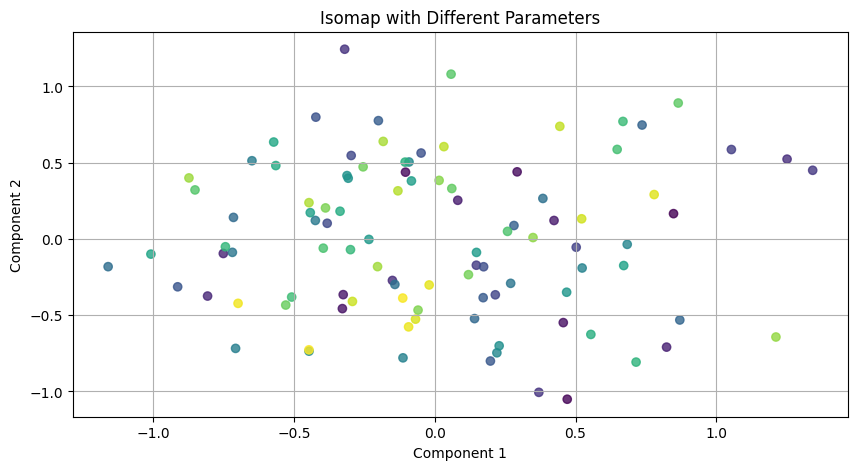

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
import numpy as np # Import numpy as it's used in the previous cell for 'color'

# Assuming X is your original dataset with shape (n_samples, n_features)
# You need to replace this with your actual original data used for Isomap.
# This is a placeholder.
# If you want to reuse the color variable from the previous cell, ensure X has the same number of samples.
n_samples = X.shape[0] # Get the number of samples from X to define color
color = np.arange(n_samples) # Define color based on the number of samples

Y_new = Isomap(n_neighbors=15, n_components=3).fit_transform(X)

# Create a new figure before adding a subplot
fig = plt.figure(figsize=(10, 5)) # Optional: Specify figure size

# Add a subplot to the newly created figure. Using 111 for a single plot.
ax_new = fig.add_subplot(111)
plt.scatter(Y_new[:, 0], Y_new[:, 1], c=color, cmap='viridis', alpha=0.8)
plt.title("Isomap with Different Parameters")
plt.xlabel("Component 1") # Add axis labels for clarity
plt.ylabel("Component 2")
plt.axis('on') # Turn on the axis
plt.grid(True) # Optional: Add grid
plt.show()

Now let us see if Isomap can learn the manifold representation in some more complex datasets

In [14]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=300)
faces.data.shape

(530, 2914)

We loaded 766 images, each having 2914 pixels. Let us visualize our dataset before reducing the dimension

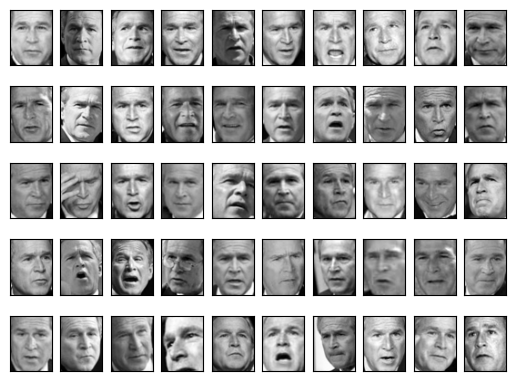

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 10, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    if i < len(faces.images):
        axi.imshow(faces.images[i], cmap='gray')

Our data is 2914 dimensional and our goal is to learn a low dimensional manifold from it. We first apply PCA (which we learn in Lab 2) and see if PCA is able to reduce it to lower dimensions while preserving much of the variance.

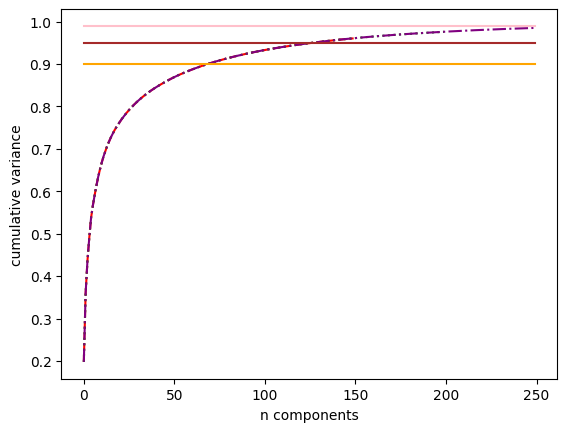

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(150).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_), color='red', linestyle='--')
model = RandomizedPCA(200).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_), color='green', linestyle=':')
model = RandomizedPCA(250).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_), color='purple', linestyle='-.')
plt.xlabel('n components')
plt.ylabel('cumulative variance')
plt.plot(range(model.n_components_), 0.9*np.ones(model.n_components_), color='orange')
plt.plot(range(model.n_components_), 0.95*np.ones(model.n_components_), color='brown')
plt.plot(range(model.n_components_), 0.99*np.ones(model.n_components_), color='pink')


So we can clearly observe that PCA requires more than 70 dimensions to be able to explain 90% of the variance, implying that PCA is failing to learn the underlying manifold effectively.

Let us now try to apply Isomap to this dataset and see if it is able to learn the representation effectively.

In [20]:
model = Isomap(n_components=3, n_neighbors = 6)
proj = model.fit_transform(faces.data)
proj.shape

(530, 3)

We have reduced the dataset from 2914 dimensions to just 2 dimensions. Let us now visualize the result to be able to better understand the latent representation learnt by Isomap

In [22]:
from IPython import get_ipython
from IPython.display import display
# %% [markdown]
# **Module 2: Appreciating, Interpreting and Visualizing Data**
# %% [markdown]
# Manifold Learning Methods
# %% [markdown]
# Today, we will be focussing on non-linear dimensionality reduction methods or Manifold learning methods.
#
# So a manifold is any space that is locally Euclidean. For example, the Earth is round but it looks flat to us. The Earth is a manifold: locally it is flat, but globally we know it is a sphere. Then, manifold learning performs dimensionality reduction by representing data as low-dimensional manifolds embedded in a higher-dimensional space.
#
# We often suspect that high-dim may actually lie on or near a low-dim manifold (often much lower!) and it would be useful if we could reparametrize the data in terms of this manifold, yielding a low-dim embedding BUT - we typically don’t know the form of this manifold
# %% [markdown]
# ![image.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABK0AAAGHCAIAAAD9VDZyAAAgAElEQVR4Aeydd3gUVdfAr5/v+yICCQSEhEDoIKBIEbDRLCCKUkRUxIKCBUVUEEWKIKCIgIoNJRKLlNA7AUKA0NJIIb03LcmW7O7M7szc8j2zszu7m4SiFAHPPvPA1Dv3/ib//J5z7zmIwQ8IAAEgAASAABAAAkAACAABIAAE/k0E0L/psDBWIAAEgAAQAAJAAAgAASAABIAAEGDggfBHAASAABAAAkAACAABIAAEgAAQ+HcRAA/8d31vGC0QAAJAAAgAASAABIAAEAACQAA8EP4GgAAQAAJAAAgAASAABIAAEAAC/y4C4IH/ru8NowUCQAAIAAEgAASAABAAAkAACIAHwt/ArUEAY8mcl8fpdJSQW6PH0EsgAASAABAAAkAACAABIAAEgcLMRAA+8Wb/DPQLiIEhxYubMmrnZ8z07+j1csG/PwdjrIuwCASAABIAAEAACQAAIAAEg8NcIgAf+NV5w940nQCnNjdi8tnXT8Lq1wuveta3Xg3aD4cZ3A94IBIAAEAACQAAIAAEgAARuGwLggbfNp7xtB0IJSVr4VXjdu5weWCu8Xm1rSfFtO2oMGBAAAkAACAABIAAEgAAQuP4EwAOvP2N4w1UTyF6/bk3TRooHbul6n72i/KqbhAaAABAAAkAACAABIAAEgMC/lwB44IH/3G9oIa9uLormyJuOHn/v3d+fMWPFnxqAW6jT0VSAABAAAkAACAABIAAEgMBdRgA88GZ7IvjVnAStaSlI37tTnxwdLFZk/gHZAwJAAAgAASAABIAAEAACRWhoAeCBl8YO7rrdBRORmTMxduZMB48nJVh3nWlD8EAACAABIAAEgAAQAAJ/

<ipython-input-24-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-24-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-24-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-24-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-24-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-24-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-24-707855023>:16: UserWar

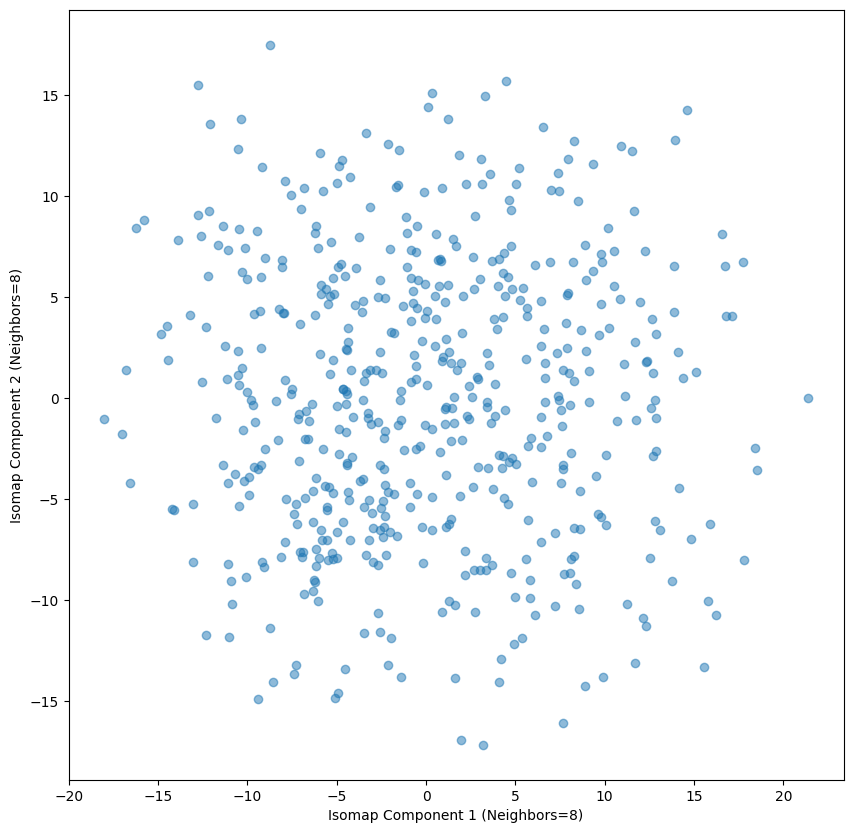

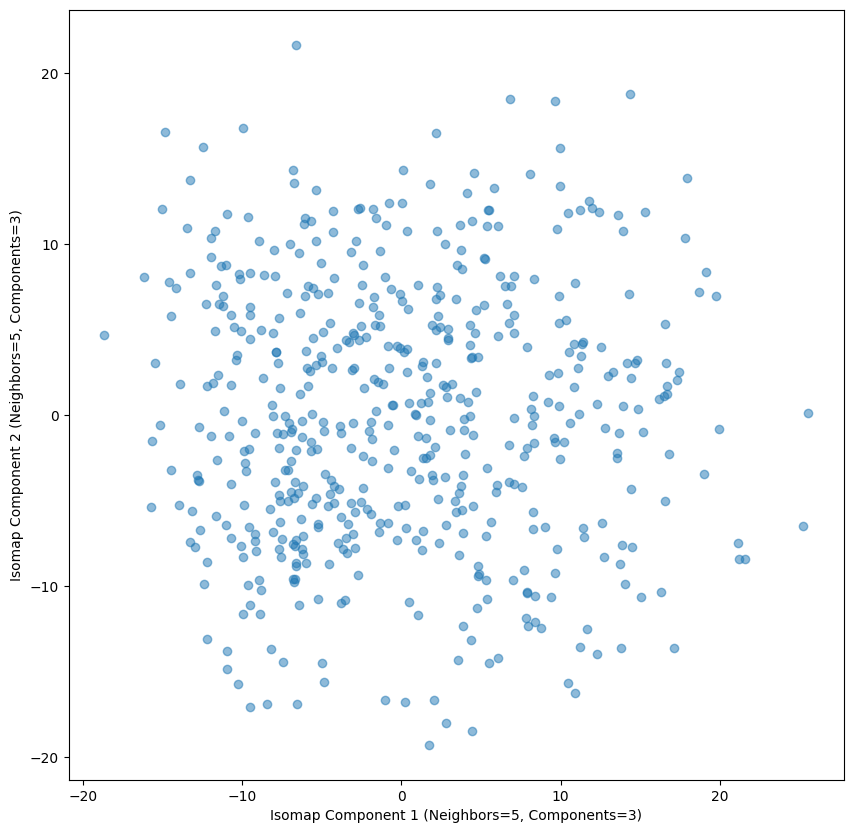

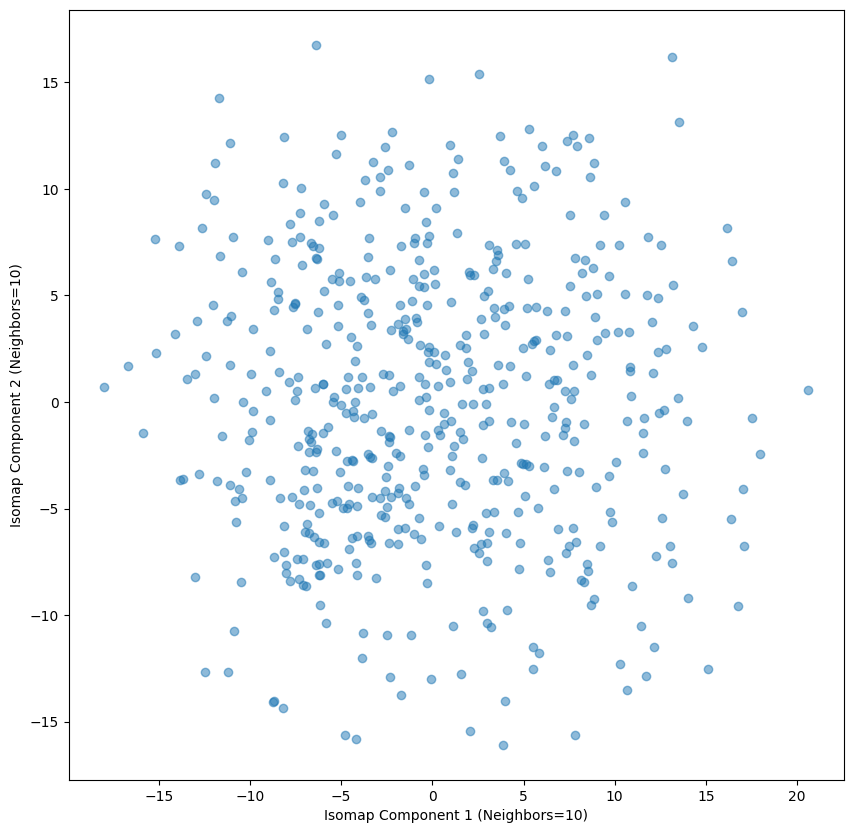

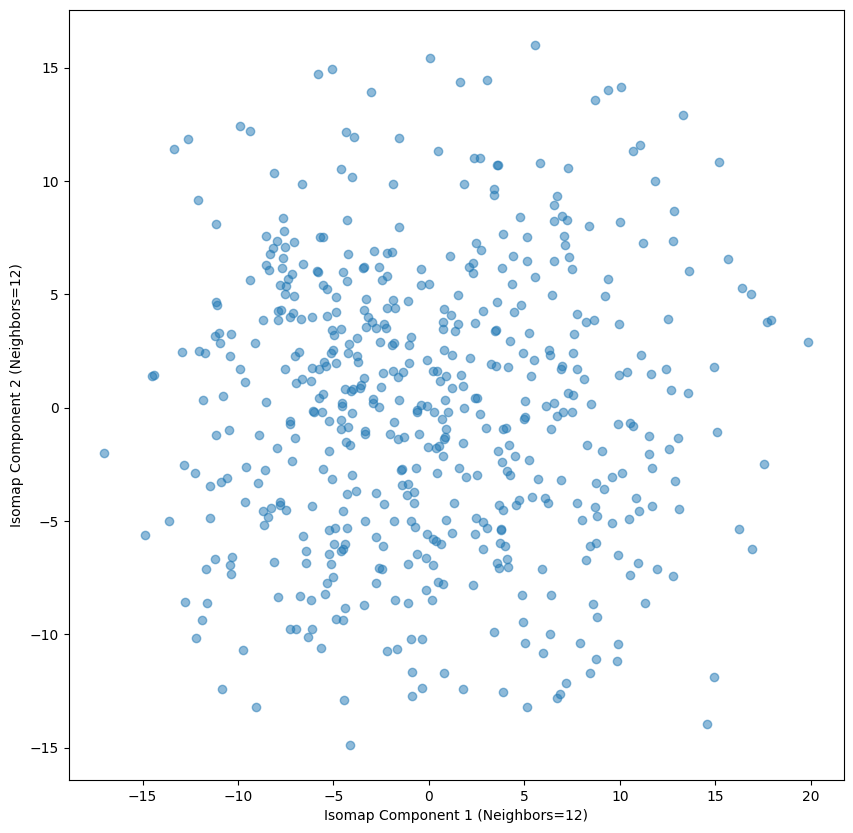

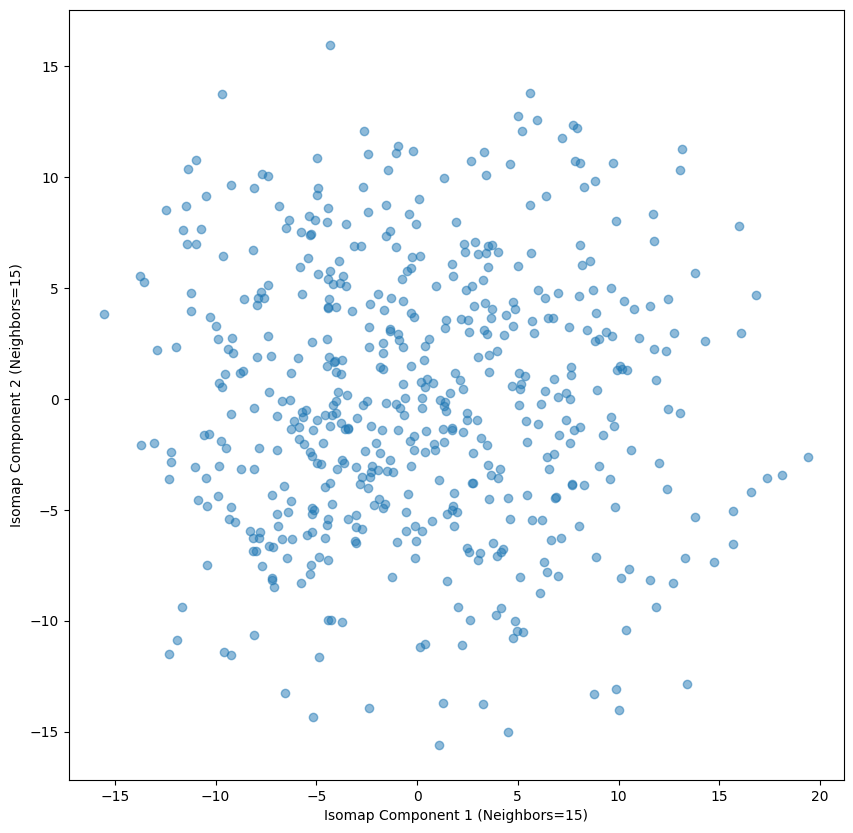

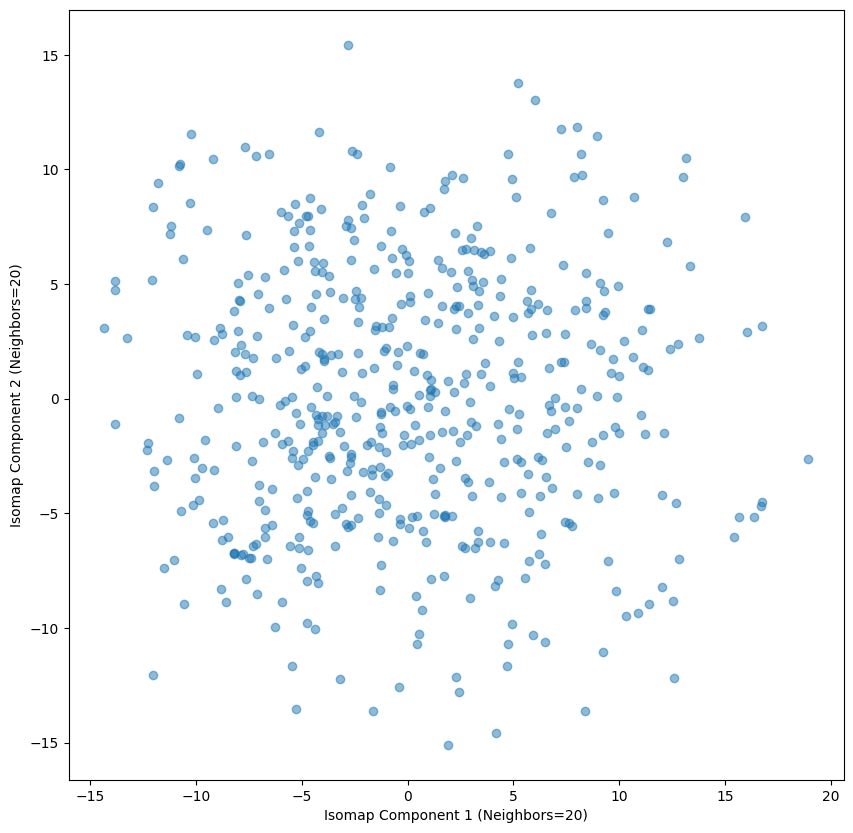

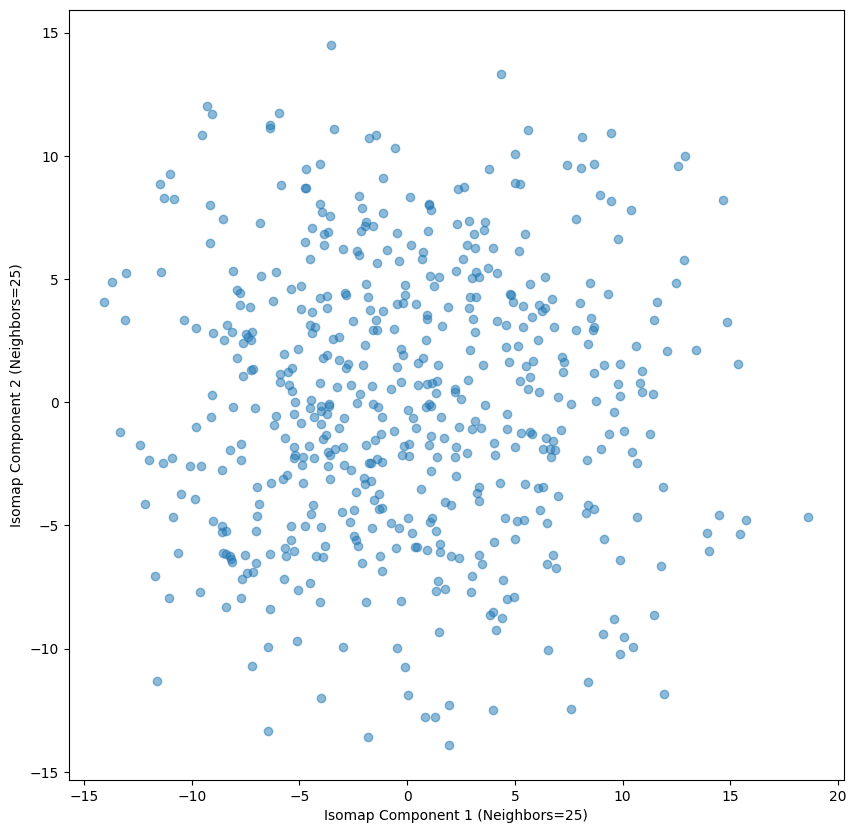

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import Isomap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Redefined plot_components to use fit_transform and simplify plotting
def plot_components(data, model, images=None, ax=None,
                      thumb_frac=0.05, cmap='gray', **kwargs):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Fit and transform the data within the function
    proj = model.fit_transform(data)

    # Plot the projected points
    ax.scatter(proj[:, 0], proj[:, 1],
               alpha=0.5, cmap=cmap, **kwargs)


# Using different parameters for Isomap and plotting the projected points
fig, ax = plt.subplots(figsize=(10, 10))
model_8_neighbors = Isomap(n_components=2, n_neighbors = 8)
plot_components(faces.data,
                model=model_8_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=8)")
plt.ylabel("Isomap Component 2 (Neighbors=8)")

fig, ax = plt.subplots(figsize=(10, 10))
model_5_neighbors_3_components = Isomap(n_components=3, n_neighbors = 5)
# Note: This will plot the first two components of the 3-component projection
plot_components(faces.data,
                model=model_5_neighbors_3_components,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=5, Components=3)")
plt.ylabel("Isomap Component 2 (Neighbors=5, Components=3)")


fig, ax = plt.subplots(figsize=(10, 10))
model_10_neighbors = Isomap(n_components=2, n_neighbors = 10)
plot_components(faces.data,
                model=model_10_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=10)")
plt.ylabel("Isomap Component 2 (Neighbors=10)")

fig, ax = plt.subplots(figsize=(10, 10))
model_12_neighbors = Isomap(n_components=2, n_neighbors = 12)
plot_components(faces.data,
                model=model_12_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=12)")
plt.ylabel("Isomap Component 2 (Neighbors=12)")

fig, ax = plt.subplots(figsize=(10, 10))
model_15_neighbors = Isomap(n_components=2, n_neighbors = 15)
plot_components(faces.data,
                model=model_15_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=15)")
plt.ylabel("Isomap Component 2 (Neighbors=15)")

fig, ax = plt.subplots(figsize=(10, 10))
model_20_neighbors = Isomap(n_components=2, n_neighbors = 20)
plot_components(faces.data,
                model=model_20_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=20)")
plt.ylabel("Isomap Component 2 (Neighbors=20)")

fig, ax = plt.subplots(figsize=(10, 10))
model_25_neighbors = Isomap(n_components=2, n_neighbors = 25)
plot_components(faces.data,
                model=model_25_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=25)")
plt.ylabel("Isomap Component 2 (Neighbors=25)")


plt.show()

<ipython-input-24-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],


Text(0, 0.5, 'Image Darkness')

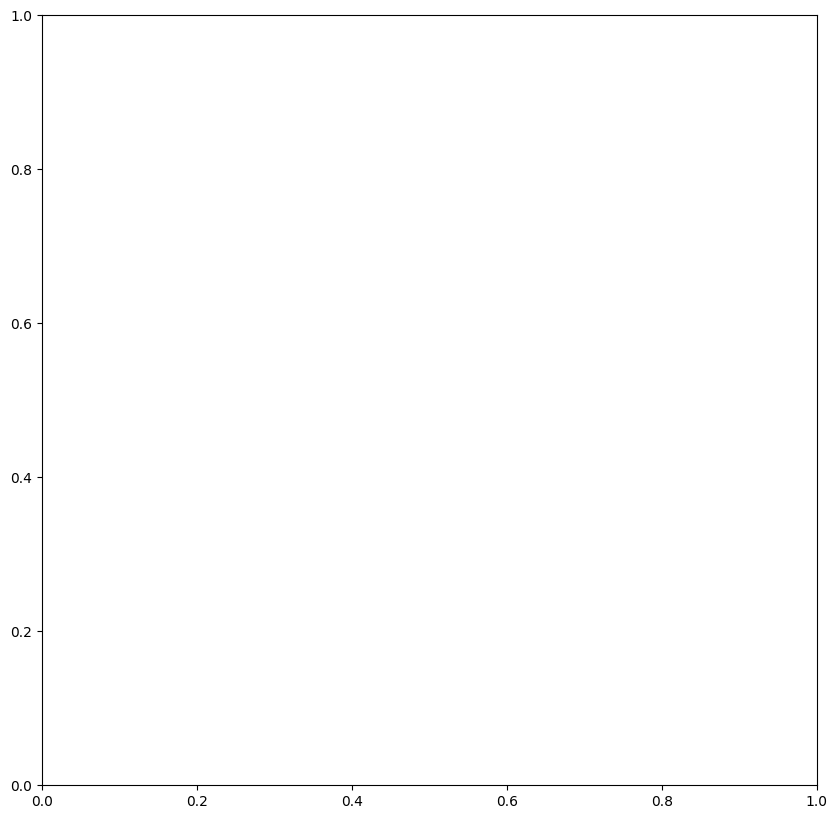

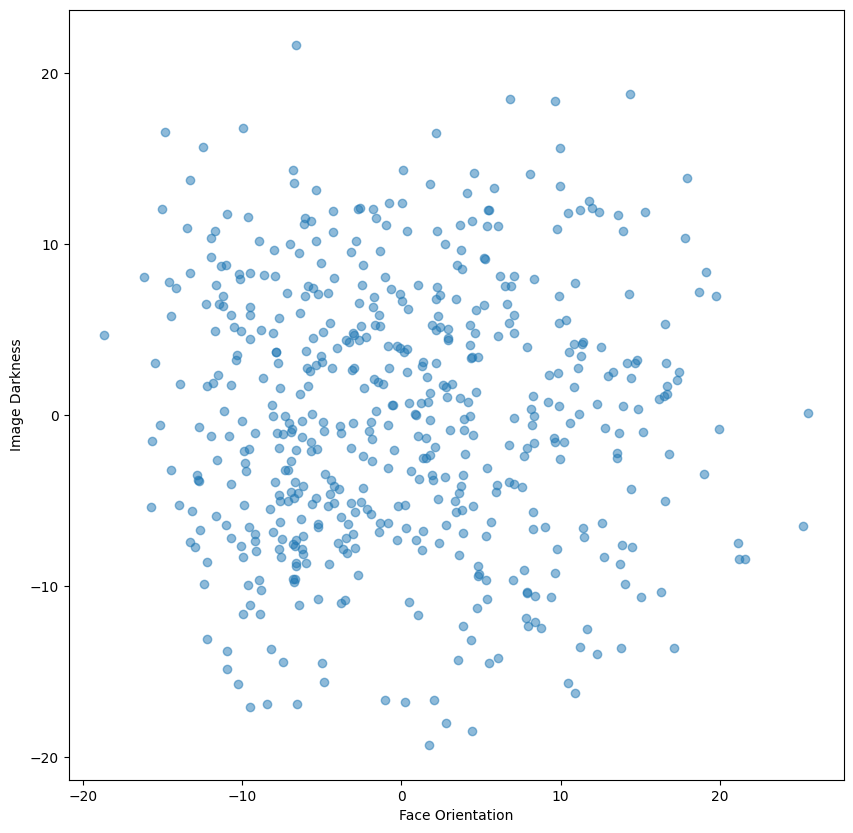

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2, n_neighbors = 5),
                images=faces.images[:, ::2, ::2])
plt.xlabel("Face Orientation")
plt.ylabel("Image Darkness")


We get a very interesting result here. You can see that the Isomap was able to capture very interesting insights regarding the dataset.

If you observe along the x-axis, the images are positioned such that the orientation of the faces changes from left to right. Similarly, the darkness of the image increases in the positive direction of the y-axis.

This clearly indicates that Isomap was able to capture the underlying manifold very precisely in just 2 dimensions.

You are motivated to play around with the number of neighbors and check if the following holds true across neighbourhoods!

Exercises!!

1.How do you think would the number of neighbors effect the Isomap algorithm? What happens when the number of neighbors considered is very large? What happens when it is very low?

2.When is the ISOMAP algorithm superior to PCA?

3.Search up another manifold learning methods other than ISOMAP? If there are any, whats the key difference ?

4.Suggest ways to deal with missing data in manifold learning.

1.How do you think would the number of neighbors effect the Isomap algorithm? What happens when the number of neighbors considered is very large? What happens when it is very low?

<ipython-input-31-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-31-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-31-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-31-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-31-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-31-707855023>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1],
<ipython-input-31-707855023>:16: UserWar

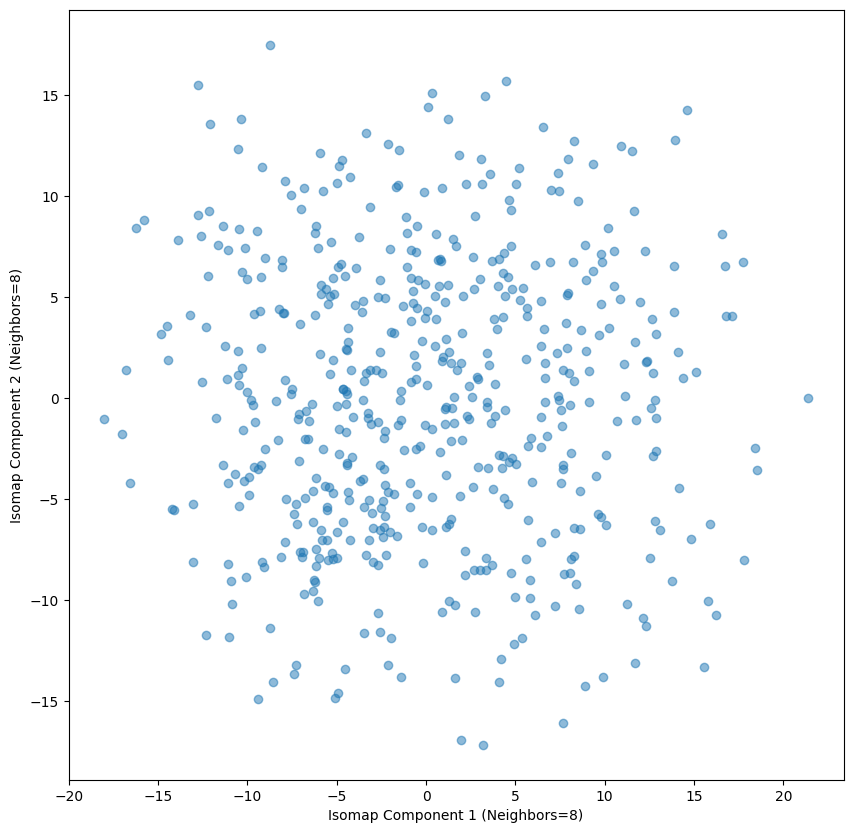

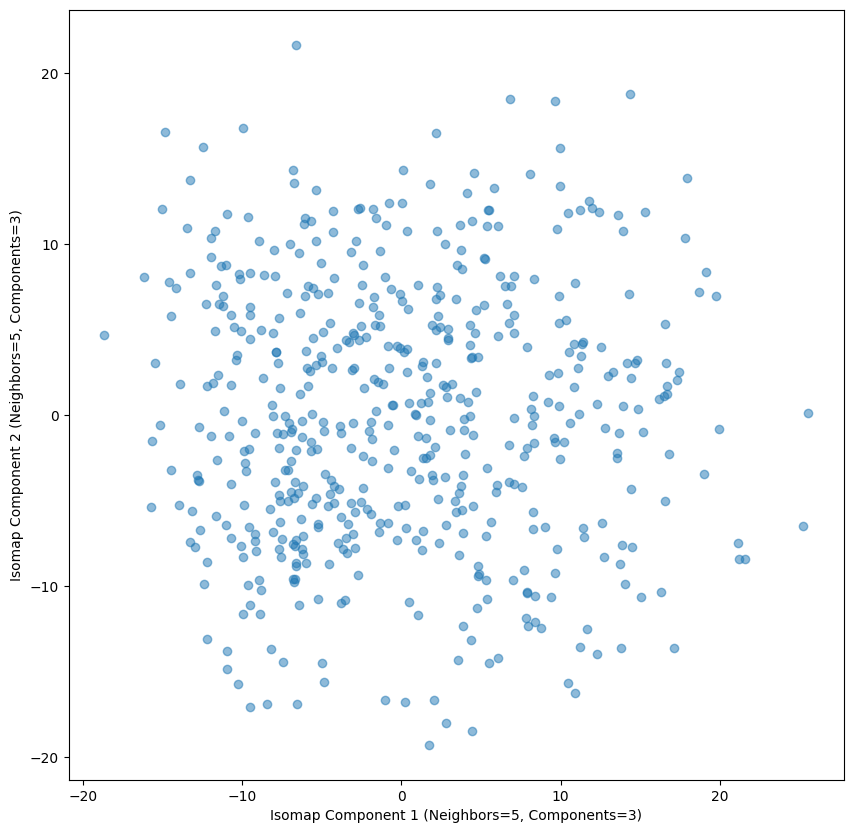

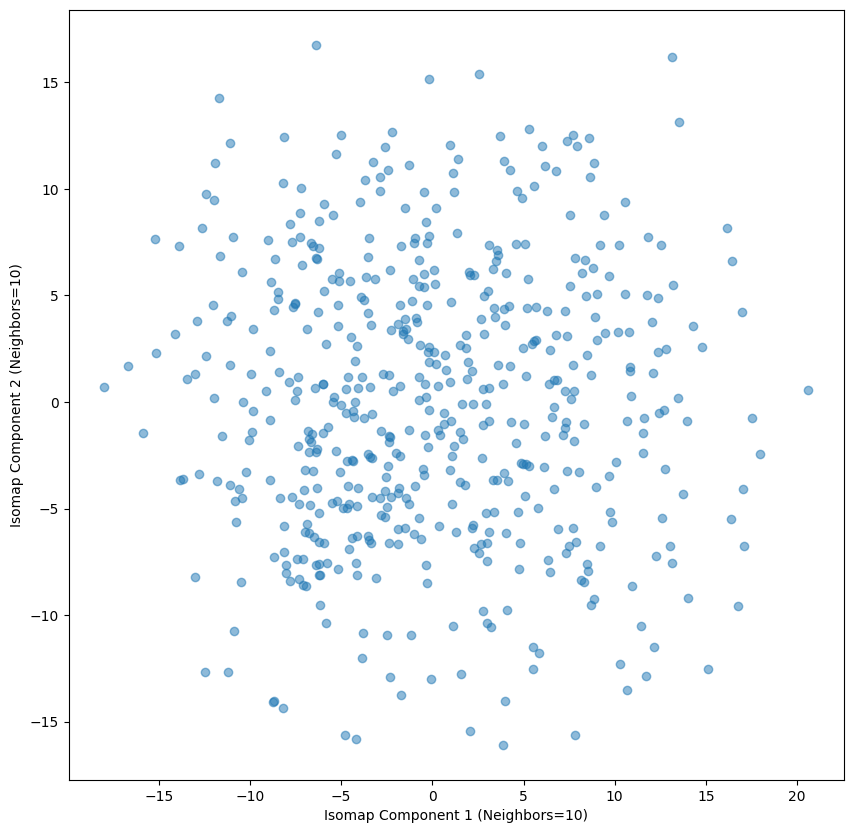

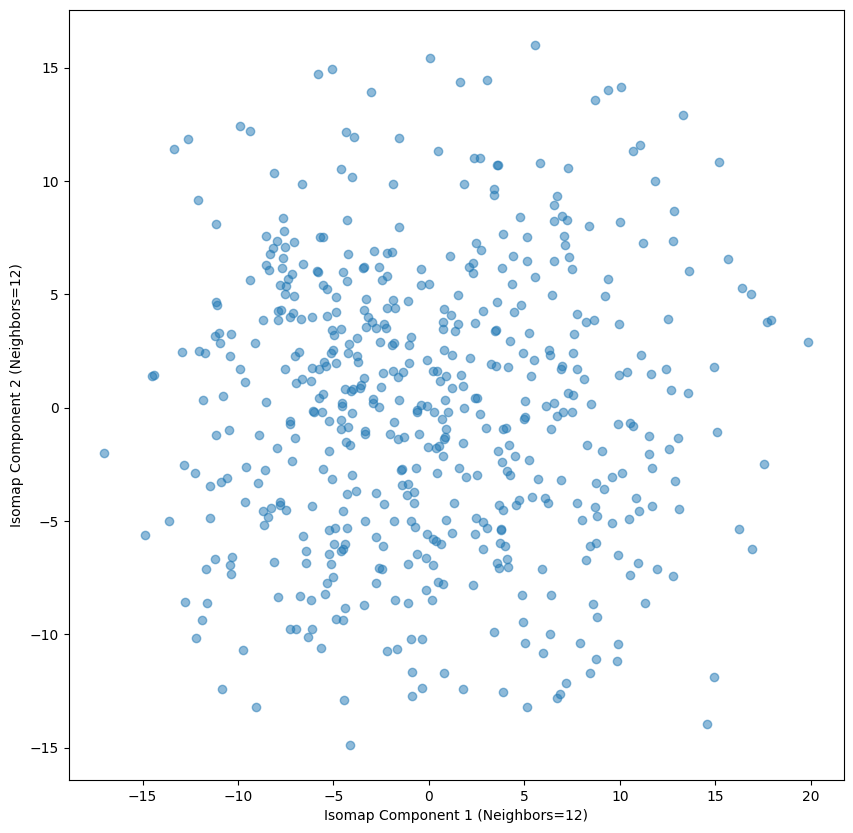

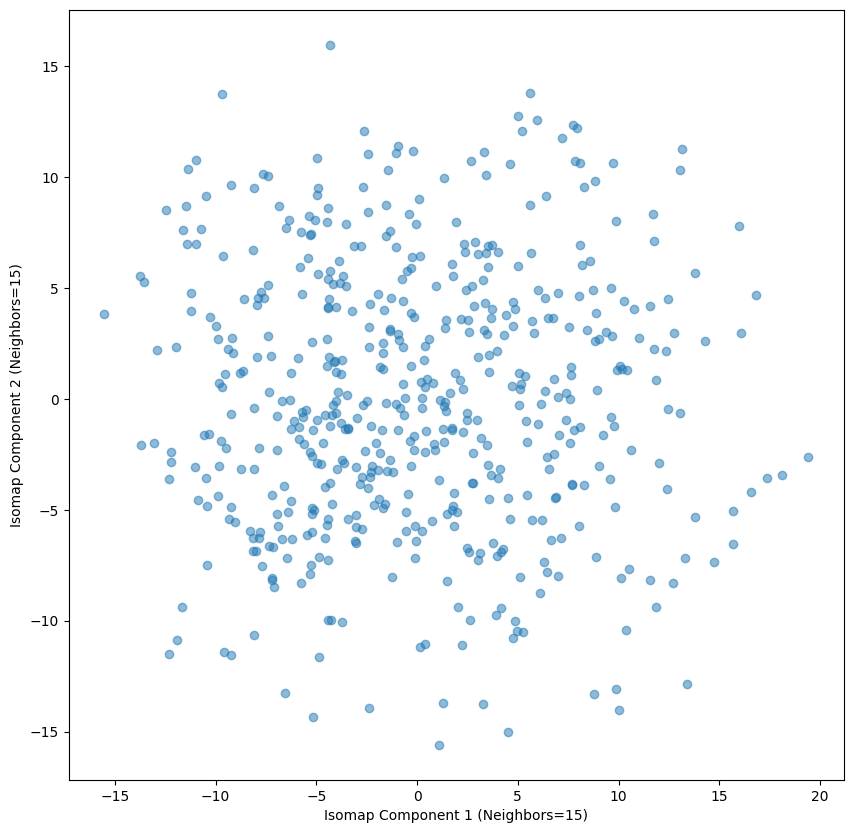

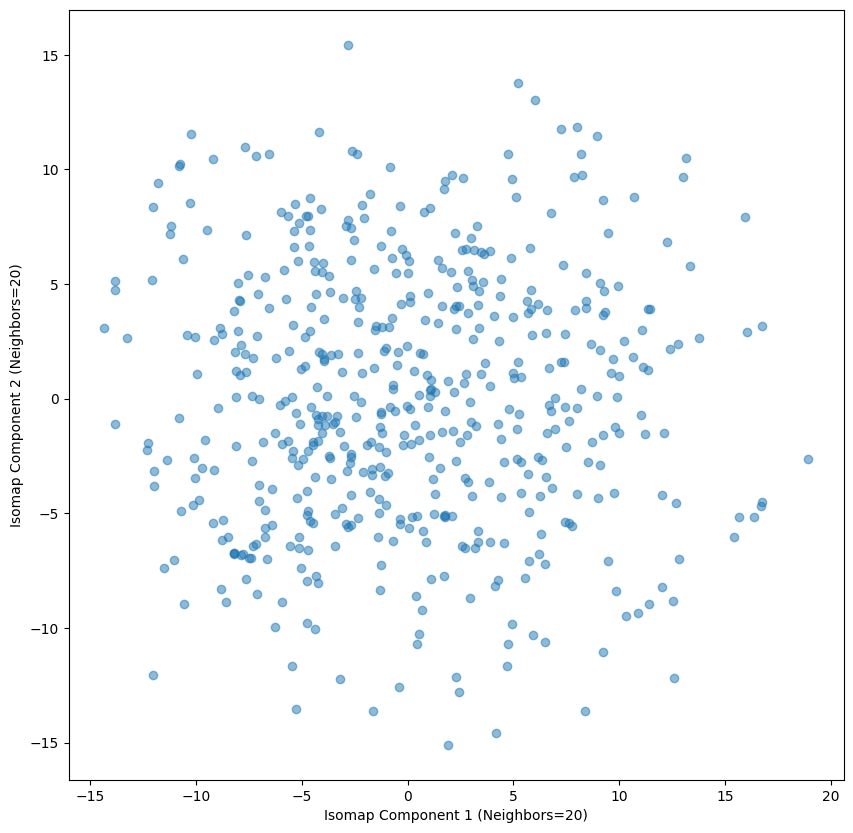

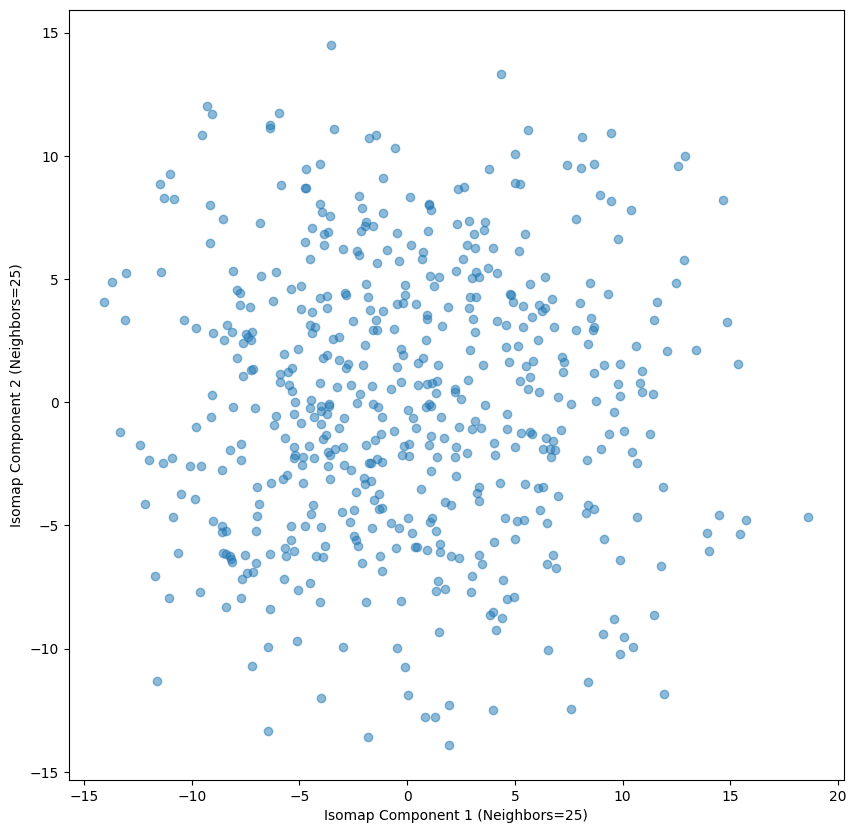

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import Isomap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Redefined plot_components to use fit_transform and simplify plotting
def plot_components(data, model, images=None, ax=None,
                      thumb_frac=0.05, cmap='gray', **kwargs):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Fit and transform the data within the function
    proj = model.fit_transform(data)

    # Plot the projected points
    ax.scatter(proj[:, 0], proj[:, 1],
               alpha=0.5, cmap=cmap, **kwargs)


# Using different parameters for Isomap and plotting the projected points
fig, ax = plt.subplots(figsize=(10, 10))
model_8_neighbors = Isomap(n_components=2, n_neighbors = 8)
plot_components(faces.data,
                model=model_8_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=8)")
plt.ylabel("Isomap Component 2 (Neighbors=8)")

fig, ax = plt.subplots(figsize=(10, 10))
model_5_neighbors_3_components = Isomap(n_components=3, n_neighbors = 5)
# Note: This will plot the first two components of the 3-component projection
plot_components(faces.data,
                model=model_5_neighbors_3_components,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=5, Components=3)")
plt.ylabel("Isomap Component 2 (Neighbors=5, Components=3)")


fig, ax = plt.subplots(figsize=(10, 10))
model_10_neighbors = Isomap(n_components=2, n_neighbors = 10)
plot_components(faces.data,
                model=model_10_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=10)")
plt.ylabel("Isomap Component 2 (Neighbors=10)")

fig, ax = plt.subplots(figsize=(10, 10))
model_12_neighbors = Isomap(n_components=2, n_neighbors = 12)
plot_components(faces.data,
                model=model_12_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=12)")
plt.ylabel("Isomap Component 2 (Neighbors=12)")

fig, ax = plt.subplots(figsize=(10, 10))
model_15_neighbors = Isomap(n_components=2, n_neighbors = 15)
plot_components(faces.data,
                model=model_15_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=15)")
plt.ylabel("Isomap Component 2 (Neighbors=15)")

fig, ax = plt.subplots(figsize=(10, 10))
model_20_neighbors = Isomap(n_components=2, n_neighbors = 20)
plot_components(faces.data,
                model=model_20_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=20)")
plt.ylabel("Isomap Component 2 (Neighbors=20)")

fig, ax = plt.subplots(figsize=(10, 10))
model_25_neighbors = Isomap(n_components=2, n_neighbors = 25)
plot_components(faces.data,
                model=model_25_neighbors,
                images=faces.images[:, ::2, ::2], ax=ax)
plt.xlabel("Isomap Component 1 (Neighbors=25)")
plt.ylabel("Isomap Component 2 (Neighbors=25)")


plt.show()

2.When is the ISOMAP algorithm superior to PCA?

In [ ]:
 When is the ISOMAP algorithm superior to PCA?
1)ISOMAP is superior to PCA when the data lies on or near a non-linear manifold in a high-dimensional space.

2) PCA is a linear dimensionality reduction technique. It finds the directions (principal components) that maximize variance in the data, assuming the data lies in a linear subspace.

3) ISOMAP, on the other hand, is a non-linear dimensionality reduction technique. It aims to preserve the geodesic distances (shortest distances along the manifold) between data points in the reduced-dimensional space.

4) Therefore, ISOMAP is more effective than PCA at capturing the underlying structure when the relationships between data points are non-linear, as demonstrated with the S-curve and faces datasets where a linear projection by PCA failed to reveal the intrinsic low-dimensional structure. ISOMAP's ability to preserve the manifold's geometry allows for a more meaningful low-dimensional representation in such cases.

5) ISOMAP is superior to PCA when the data lies on a non-linear manifold.

6) PCA performs best on linearly separable data.

7) ISOMAP captures the underlying geometric structure through geodesic distances.

8) PCA uses Euclidean distances, which can be misleading on curved surfaces.

9) Therefore, for datasets with complex, non-linear relationships, ISOMAP is preferred.

In [ ]:


 ISOMAP is superior to PCA when the data lies on a non-linear manifold.
 PCA performs best on linearly separable data.
 ISOMAP captures the underlying geometric structure through geodesic distances.
 PCA uses Euclidean distances, which can be misleading on curved surfaces.
 Therefore, for datasets with complex, non-linear relationships, ISOMAP is preferred.

3.Search up another manifold learning methods other than ISOMAP? If there are any, whats the key difference

In [ ]:
Manifold learning is a broad field with several algorithms designed to find low-dimensional representations of data that lie on a manifold. Besides ISOMAP, other prominent methods include:

1.  **Locally Linear Embedding (LLE):**
    *   **Key Difference:** Unlike ISOMAP which focuses on preserving global geodesic distances, LLE focuses on preserving local linear relationships. It assumes that each data point can be represented as a linear combination of its neighbors. It then finds an embedding where these local linear relationships are maintained in the lower-dimensional space.
    *   **Detailed Differences (10 Points):**
        1.  **Distance Metric:** LLE uses Euclidean distance locally to find neighbors and reconstruct points from neighbors. ISOMAP uses Euclidean distance for initial neighbor distances but then calculates geodesic distances via shortest paths.

        2.  **Preservation Goal:** LLE aims to preserve local linear structures. ISOMAP aims to preserve global geodesic distances.

        3.  **Mathematical Approach:** LLE involves finding weights to reconstruct each point from its neighbors and then finding a low-dimensional embedding that preserves these weights. ISOMAP constructs a neighborhood graph, computes shortest paths, and then uses Multi-dimensional Scaling (MDS) on the geodesic distance matrix.

        4. Computational Complexity: LLE's computation can involve solving a sparse eigenvalue problem. ISOMAP involves building a graph, running an all-pairs shortest path algorithm (like Dijkstra's), and then performing MDS. The complexity of shortest paths can be significant for large datasets.

        5.  **Global vs. Local:** LLE is inherently a local method, focusing on preserving neighborhood structure. ISOMAP attempts to capture the global geometry by approximating geodesic distances.

        6.  **Sensitivity to Noise:** LLE can be sensitive to noise as it relies on precise local linear reconstructions. ISOMAP can be somewhat more robust to noise due to the averaging effect of shortest path calculations, although outliers can still be problematic.

        7.  **Handling Non-convex Manifolds:** Both can handle non-convex manifolds, but their success depends on the data and parameter choices.

        8.  **Embedding Stability:** The resulting embedding in LLE can sometimes be less stable or unique compared to ISOMAP depending on the data and the choice of neighbors.

        9.  **Parameter Tuning:** Both require tuning the number of neighbors. ISOMAP also relies on the distance metric used in the graph.

        10. **Out-of-sample Mapping:** Extending LLE or ISOMAP to new, unseen data points (out-of-sample mapping) is not straightforward for either method without additional techniques.

2.  t-Distributed Stochastic Neighbor Embedding (t-SNE):
    *   **Key Difference:** t-SNE is primarily designed for visualization and excels at preserving local neighborhood relationships while also creating clear separations between clusters. It achieves this by converting high-dimensional Euclidean distances into joint probabilities representing similarities and then mapping these probabilities to a lower-dimensional space (typically 2D or 3D) using a t-distribution to model similarities.
    *   Detailed Differences (10 Points):
        1.  **Purpose:** t-SNE is primarily for visualization of high-dimensional data. ISOMAP aims for general dimensionality reduction and capturing underlying structure.
        2.  **Preservation Goal:** t-SNE aims to preserve local neighborhood structures (nearby points in high dimension remain nearby in low dimension) and also aims to push well-separated clusters apart. ISOMAP focuses on preserving global geodesic distances.
        3.  **Distance Metric:** t-SNE uses probabilistic modeling of distances (Gaussian in high dimension, t-distribution in low dimension). ISOMAP uses Euclidean distance initially and then geodesic distances.
        4.  **Optimization:** t-SNE uses a gradient descent optimization to minimize the difference between the similarity distributions in high and low dimensions. ISOMAP uses graph construction, shortest paths, and MDS (eigenvalue decomposition).
        5.  **Global Structure:** While t-SNE preserves local structure well and separates clusters, the global arrangement of clusters in a t-SNE plot can be misleading. ISOMAP aims to preserve global distances.
        6.  **Computational Cost:** t-SNE can be computationally expensive, especially for large datasets, though optimizations exist. ISOMAP's cost is dominated by the all-pairs shortest path calculation.
        7.  **Reproducibility:** t-SNE's optimization is non-convex, so different runs can produce slightly different results. ISOMAP, being based on eigenvalue decomposition, is more deterministic given the same input graph.
        8.  **Embedding Dimension:** t-SNE is typically used for dimensionality reduction to 2 or 3 dimensions for visualization. ISOMAP can reduce to an arbitrary number of components.
        9.  **Parameter Tuning:** t-SNE has parameters like perplexity and learning rate which significantly influence the output. ISOMAP's main parameters are the number of neighbors and components.
        10. **Interpretability:** The axes in a t-SNE plot do not have a specific meaning like in PCA or sometimes ISOMAP. The interpretation is primarily based on the clustering and neighborhood relationships. ISOMAP's components can sometimes be more interpretable as underlying features of the manifold.

These are just two examples; other manifold learning methods include MDS (which ISOMAP uses as a component), Hessian Eigenmapping (HLLE), and Spectral Embedding (Laplacian Eigenmaps). Each method has its strengths and weaknesses, and the choice depends on the nature of the data and the goals of the dimensionality reduction.

4.Suggest ways to deal with missing data in manifold learning.

In [ ]:
Dealing with missing data in manifold learning, particularly methods like Isomap which rely on distance computations and graph construction, presents challenges. Here are several approaches:

1)  **Imputation:**
    *   **Mean, Median, or Mode Imputation:** Replace missing values with the mean, median, or mode of the available data for that feature. This is a simple approach but can distort the true underlying structure of the manifold, especially if a significant amount of data is missing or if the data distribution is non-Gaussian.
    *   **K-Nearest Neighbors (KNN) Imputation:** Impute missing values based on the values of the nearest neighbors in the original high-dimensional space. This can preserve local structures better than simple imputation but requires a distance metric that can handle missing values or a prior imputation step to define neighbors.
    *   **Model-based Imputation:** Use a model (e.g., regression, matrix factorization) trained on the complete data to predict the missing values. This can capture more complex relationships but relies on the assumption that the observed data is representative of the full data distribution.
    *   **Imputation specifically for manifold learning:** Some methods have been proposed to impute data while considering the manifold structure. This might involve iterative approaches where imputation and manifold learning steps are alternated.

2)  **Handling Missing Data during Distance Computation:**
*    **Pairwise Distance Metrics Robust to Missing Data:** Use distance metrics that can handle missing values directly, such as variants of Euclidean distance that only consider available features. For example, calculating the squared Euclidean distance only for the features present in both points.
    * **Weighted Distance Metrics:** Assign weights to features based on their availability when calculating distances. Features with missing values might have lower weights.
    * **Imputation within the Distance Calculation:** Locally impute missing values for a pair of points before computing their distance.

3)  **Modifying the Manifold Learning Algorithm:**
    *Adapting the Graph Construction:** Modify the neighborhood selection step to handle missing values. For instance, when finding nearest neighbors, adjust the distance calculation to accommodate missing data.
    *Incomplete Distance Matrices:** Some manifold learning algorithms (or extensions of them) can work with incomplete distance matrices. This is particularly relevant if you are using a method that directly operates on a distance or similarity matrix (like Isomap's geodesic distance step).
    **Probabilistic Manifold Learning Models:** Use probabilistic models that can inherently handle missing data by marginalizing over the missing values. Gaussian Process Latent Variable Models (GP-LVM) are an example.

4)  **Using Manifold Learning Methods Less Sensitive to Missing Data:**
    *   Some manifold learning techniques might be less affected by missing data than others. For example, methods that focus on local neighborhoods might be more robust to scattered missing values than methods that rely on global structures derived from all pairs of points.

Considerations:

*   **Percentage of Missing Data:** The best approach often depends on the proportion of missing data. High percentages of missing data make imputation and distance calculations more challenging.
*   **Nature of Missing Data:** Understanding whether the data is Missing Completely at Random (MCAR), Missing At Random (MAR), or Missing Not At Random (MNAR) can inform the choice of method.
*   **Computational Cost:** More sophisticated imputation or algorithm modifications can be computationally more expensive.

In the context of Isomap, since its first step involves building a neighborhood graph based on distances, addressing missing data in the distance calculation or through imputation prior to this step is crucial. Modifying the shortest path calculation to handle missing edges or nodes (due to extensive missing data) would also be necessary in some scenarios.

Conclusion:

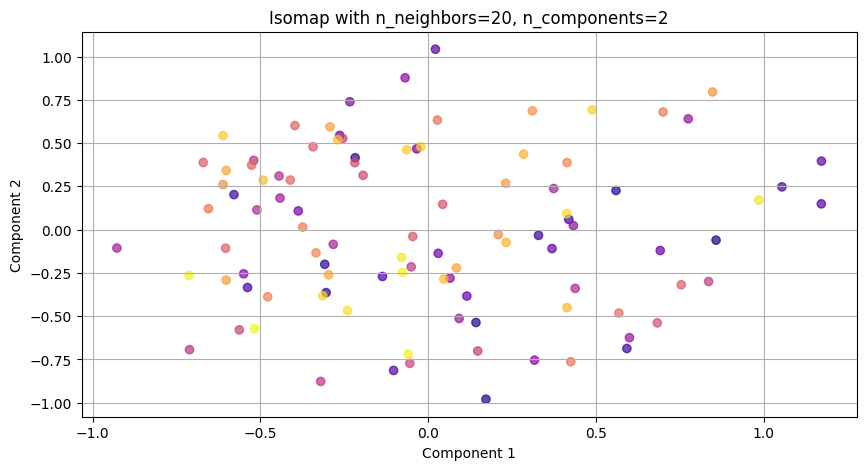

In [33]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming X is your original dataset with shape (n_samples, n_features)
# You need to replace this with your actual original data used for Isomap.
# This is a placeholder.
# If you want to reuse the color variable from the previous cell, ensure X has the same number of samples.
n_samples = X.shape[0] # Get the number of samples from X to define color
color = np.arange(n_samples) # Define color based on the number of samples

Y_new = Isomap(n_neighbors=20, n_components=2).fit_transform(X)

# Create a new figure before adding a subplot
fig = plt.figure(figsize=(10, 5)) # Optional: Specify figure size

# Add a subplot to the newly created figure. Using 111 for a single plot.
ax_new = fig.add_subplot(111)
plt.scatter(Y_new[:, 0], Y_new[:, 1], c=color, cmap='plasma', alpha=0.7)
plt.title("Isomap with n_neighbors=20, n_components=2")
plt.xlabel("Component 1") # Add axis labels for clarity
plt.ylabel("Component 2")
plt.axis('on') # Turn on the axis
plt.grid(True) # Optional: Add grid
plt.show()

Conclusion :

In practice manifold learning techniques tend to be finicky enough that they are rarely used for anything more than simple qualitative visualization of high-dimensional data.

The following are some of the particular challenges of manifold learning, which all contrast poorly with PCA:

1) In manifold learning, there is no good framework for handling missing data. In contrast, there are straightforward iterative approaches for missing data in PCA.

2) In manifold learning, the presence of noise in the data can "short-circuit" the manifold and drastically change the embedding. In contrast, PCA naturally filters noise from the most important components.

3) The manifold embedding result is generally highly dependent on the number of neighbors chosen, and there is generally no solid quantitative way to choose an optimal number of neighbors. In contrast, PCA does not involve such a choice.

4) In manifold learning, the globally optimal number of output dimensions is difficult to determine. In contrast, PCA lets you find the output dimension based on the explained variance.

5) In manifold learning, the meaning of the embedded dimensions is not always clear. In PCA, the principal components have a very clear meaning.

6) In manifold learning the computational expense of manifold methods scales as O[N^2] or O[N^3]. For PCA, there exist randomized approaches that are generally much faster (though see the megaman package for some more scalable implementations of manifold learning).

Therefore with all that on the table, the only clear advantage of manifold learning methods over PCA is their ability to preserve nonlinear relationships in the data; for that reason I tend to explore data with manifold methods only after first exploring them with PCA.



